In [18]:
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, auc

In [19]:
testfile = 'Bladder Project pCR Prediction Data (Updated 030222)_noipc.txt'
df=pd.read_csv(testfile,sep='\t', index_col=0)
display(df)

pCR  Age  Sex  Race  Urothelial  Smoking  NAC  MIBC  Incidental PC  \
ID                                                                            
WBC1050    1   63    2     1           1        1    1     1              0   
WBC1058    0   78    1     1           1        0    0     1              0   
WBC1062    0   77    1     1           0        1    1     1              0   
WBC1063    1   67    1     1           1        0    1     1              0   
WBC1064    1   60    1     1           1        1    1     1              0   
WBC1069    0   61    1     1           1        1    0     1              0   
WBC1071    0   68    1     1           1        0    0     1              0   
WBC1076    0   75    1     1           1        1    0     1              0   
WBC1083    0   66    1     1           1        1    1     1              0   
WBC1085    0   72    1     1           1        1    0     1              0   
WBC1090    0   83    1     1           1        0    0     0              0   
WBC1096    0   86    1     1           1        0    0     1              0   
WBC1104    0   55    1     1           0        0    1     1              0   
WBC1108    1   53    2     1           1        0    0     0              0   
WBC1109    1   83    1     1           1        1    0     0              0   
WBC1116    0   72    2     2           1        1    0     1              0   
WBC1132    0   51    1     1           1        0    1     1              0   
WBC1133    1   68    2     1           1        1    0     1              0   
WBC1135    0   59    2     1           1        1    1     1              0   
WBC1140    0   70    2     1           1        1    0     0              0   
WBC1174    1   69    1     1           1        1    0     0              0   
WBC1182    0   72    1     1           1        1    0     1              0   
WBC1185    1   65    1     1           1        1    1     1              0   
WBC1186    0   82    2     1           1        0    0     1              0   
WBC1188    0   72    1     1           1        1    0     1              0   
WBC1198    1   63    2     1           0        1    1     1              0   
WBC1202    0   66    2     1           1        1    0     1              0   
WBC1203    1   82    1     1           1        1    1     1              0   
WBC1205    1   64    1     1           1        1    1     1              0   
WBC1206    0   65    2     1           0        0    0     1              0   
WBC1207    1   76    1     1           1        1    1     1              0   
WBC1209    0   50    1     1           0        0    0     1              0   
WBC1215    1   76    1     1           1        1    0     0              0   
WBC1222    0   53    1     2           1        1    0     1              0   
WBC1229    0   52    1     1           1        1    1     1              0   
WBC1233    0   74    1     1           1        1    0     1              0   
WBC1235    0   69    1     1           1        1    1     1              0   
WBC1242    1   48    2     1           1        1    1     1              0   
WBC1243    1   77    1     1           1        1    1     1              0   
WBC1256    1   78    1     1           1        1    1     1              0   
WBC1260    0   84    1     1           1        0    0     0              0   
WBC1269    0   57    1     1           1        0    1     1              0   
WBC1274    1   62    1     1           1        1    1     1              0   
WBC1275    0   67    2     1           1        1    0     0              0   
WBC1277    1   76    2     1           1        1    1     1              0   
WBC1284    1   75    1     1           1        1    0     0              0   
WBC1291    0   49    2     3           0        1    0     1              0   
WBC1295    1   65    1     1           1        1    1     1              0   
WBC1298    1   50    1     1           1        1    1     

In [20]:
# Perform operation on utDNA and TF99 and drop the unwanted columns
testratio=32/74
df_test = df.copy()
df_test['Operation'] = np.power((np.array(df['utDNA']) + 1) * (np.array(df['TF99']) + 1), 1.5)
df_test = df_test[['pCR', 'Age', 'Sex', 'Race', 'Urothelial', 'Smoking', 'NAC', 'MIBC', 'Operation']]
display(df_test)

pCR  Age  Sex  Race  Urothelial  Smoking  NAC  MIBC      Operation
ID                                                                         
WBC1050    1   63    2     1           1        1    1     1       6.547900
WBC1058    0   78    1     1           1        0    0     1     113.629740
WBC1062    0   77    1     1           0        1    1     1      26.283210
WBC1063    1   67    1     1           1        0    1     1       4.436553
WBC1064    1   60    1     1           1        1    1     1       1.000000
WBC1069    0   61    1     1           1        1    0     1    2317.810992
WBC1071    0   68    1     1           1        0    0     1      36.981495
WBC1076    0   75    1     1           1        1    0     1     124.700120
WBC1083    0   66    1     1           1        1    1     1     442.629048
WBC1085    0   72    1     1           1        1    0     1  138426.559849
WBC1090    0   83    1     1           1        0    0     0     588.173791
WBC1096    0   86    1     1           1        0    0     1  208529.636003
WBC1104    0   55    1     1           0        0    1     1      35.887511
WBC1108    1   53    2     1           1        0    0     0       1.000000
WBC1109    1   83    1     1           1        1    0     0       1.000000
WBC1116    0   72    2     2           1        1    0     1     127.256737
WBC1132    0   51    1     1           1        0    1     1       3.952847
WBC1133    1   68    2     1           1        1    0     1    6200.270911
WBC1135    0   59    2     1           1        1    1     1     275.502967
WBC1140    0   70    2     1           1        1    0     0     115.377870
WBC1174    1   69    1     1           1        1    0     0    1236.456149
WBC1182    0   72    1     1           1        1    0     1    7296.728495
WBC1185    1   65    1     1           1        1    1     1      29.050105
WBC1186    0   82    2     1           1        0    0     1     520.181637
WBC1188    0   72    1     1           1        1    0     1    7232.815773
WBC1198    1   63    2     1           0        1    1     1       1.000000
WBC1202    0   66    2     1           1        1    0     1      26.283210
WBC1203    1   82    1     1           1        1    1     1       1.000000
WBC1205    1   64    1     1           1        1    1     1      27.814037
WBC1206    0   65    2     1           0        0    0     1     131.352627
WBC1207    1   76    1     1           1        1    1     1       1.000000
WBC1209    0   50    1     1           0        0    0     1     689.142317
WBC1215    1   76    1     1           1        1    0     0       1.000000
WBC1222    0   53    1     2           1        1    0     1      35.492422
WBC1229    0   52    1     1           1        1    1     1     568.677326
WBC1233    0   74    1     1           1        1    0     1     498.856882
WBC1235    0   69    1     1           1        1    1     1       7.117092
WBC1242    1   48    2     1           1        1    1     1      14.991855
WBC1243    1   77    1     1           1        1    1     1       1.000000
WBC1256    1   78    1     1           1        1    1     1       1.000000
WBC1260    0   84    1     1           1        0    0     0     250.897982
WBC1269    0   57    1     1           1        0    1     1     215.190506
WBC1274    1   62    1     1           1        1    1     1    2362.419267
WBC1275    0   67    2     1           1        1    0     0     991.013514
WBC1277    1   76    2     1           1        1    1     1       1.000000
WBC1284    1   75    1     1           1        1    0     0       6.830520
WBC1291    0   49    2     3           0        1    0     1    7099.210692
WBC1295    1   65    1     1           1        1    1     1     161.123027
WBC1298    1   50    1     1           1        1    1     1       6.547900
WBC1300    0   71    1     1           1        1    0     1       1.000000
WBC1303    1   76    1     1           1        0    0   

In [21]:
# Perform machine learning
X=df_test.drop(['pCR'],axis=1)
Y=df_test["pCR"].copy()
ind = df_test.index
trainX,testX,trainY,testY,train_in,test_in =  train_test_split(X,Y,ind,test_size=testratio, random_state=0)
my_final_classifier = RandomForestClassifier(n_estimators=2000, oob_score=True, random_state=1)
my_final_classifier.fit(trainX, trainY)

# Get the probability predictions 
pred = my_final_classifier.predict_proba(testX)[:,1]
pred_train = my_final_classifier.predict_proba(trainX)[:,1]
pred_all = my_final_classifier.predict_proba(trainX.append(testX))[:,1]

print('Oob_score =', my_final_classifier.oob_score_)
print('ROC Score =', roc_auc_score(testY, my_final_classifier.predict_proba(testX)[:,1]))

# Get the sensitivity and specificity for each set of data

# Training
fpr_train, tpr_train, thresholds_train = roc_curve(trainY, pred_train)
auc_train = metrics.roc_auc_score(trainY, pred_train)
sens_train_arr = tpr_train
spec_train_arr = 1 - fpr_train
gmeans_train = np.sqrt(sens_train_arr * spec_train_arr)
ix_train = np.argmax(gmeans_train)

# Test
fpr, tpr, thresholds = roc_curve(testY, pred)
auc_test = metrics.roc_auc_score(testY, pred)

# All
fpr_all, tpr_all, thresholds_all = roc_curve(trainY.append(testY), pred_all)
auc_all = metrics.roc_auc_score(trainY.append(testY), pred_all)

# Find the best threshold
thresh = thresholds_train[ix_train]

# Calculate specificity and sensitivities using confusion matrix
y_pred_test = list((pred >= thresh).astype(int))
cm1 = confusion_matrix(list(testY), y_pred_test)
spec_pred = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sens_pred = cm1[1,1]/(cm1[1,0]+cm1[1,1])

y_pred_train = list((pred_train >= thresh).astype(int))
cm1 = confusion_matrix(list(trainY), y_pred_train)
spec_train = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sens_train = cm1[1,1]/(cm1[1,0]+cm1[1,1])

y_pred_all = list((pred_all >= thresh).astype(int))
cm1 = confusion_matrix(list(trainY.append(testY)), y_pred_all)
spec_all = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sens_all = cm1[1,1]/(cm1[1,0]+cm1[1,1])

print('Best Threshold=%f, G-Mean=%.3f' % (thresh, gmeans_train[ix_train]), '\n')

df_prob_train = pd.DataFrame([list(trainY), list(pred_train), y_pred_train], index=['pCR_Train', 'Probability', 'Prediction']).T
df_prob_test = pd.DataFrame([list(testY), list(pred), y_pred_test], index=['pCR_Test', 'Probability', 'Prediction']).T
df_prob = pd.DataFrame([list(trainY.append(testY)), list(pred_all), y_pred_all], index=['pCR_All', 'Probability', 'Prediction']).T
display(df_prob_train)
display(df_prob_test)
display(df_prob)
df_prob_train.to_csv(testfile + '_prob_train.txt', sep='\t')
df_prob_test.to_csv(testfile + '_prob_test.txt', sep='\t')
df_prob.to_csv(testfile + '_prob_combined.txt', sep='\t')

# Display sensitivities and specificities
df_ss = pd.DataFrame([[sens_pred, spec_pred], \
          [sens_train, spec_train], \
          [sens_all, spec_all]],\
         columns=['Sensitivity', 'Specificity'], index=['Test', 'Train', 'All'])
display(df_ss)

Oob_score = 0.5625
ROC Score = 0.9600000000000001
Best Threshold=0.693000, G-Mean=1.000 



pCR_Train  Probability  Prediction
0         0.0       0.1465         0.0
1         0.0       0.0675         0.0
2         0.0       0.2145         0.0
3         1.0       0.9845         1.0
4         0.0       0.3090         0.0
5         1.0       0.8380         1.0
6         1.0       0.7155         1.0
7         0.0       0.2265         0.0
8         0.0       0.2585         0.0
9         1.0       0.7905         1.0
10        1.0       0.8990         1.0
11        1.0       0.6930         1.0
12        1.0       0.8025         1.0
13        1.0       0.8695         1.0
14        1.0       0.9840         1.0
15        0.0       0.0925         0.0
16        0.0       0.1750         0.0
17        0.0       0.1850         0.0
18        0.0       0.0310         0.0
19        0.0       0.0775         0.0
20        0.0       0.1020         0.0
21        0.0       0.2985         0.0
22        0.0       0.0310         0.0
23        0.0       0.1525         0.0
24        0.0       0.0195         0.0
25        1.0       0.9755         1.0
26        1.0       0.7765         1.0
27        1.0       0.7295         1.0
28        1.0       0.9275         1.0
29        1.0       0.8500         1.0
30        1.0       0.7130         1.0
31        1.0       0.9660         1.0

pCR_Test  Probability  Prediction
0        0.0       0.1830         0.0
1        0.0       0.5890         0.0
2        0.0       0.3930         0.0
3        1.0       0.9570         1.0
4        0.0       0.0840         0.0
5        0.0       0.4735         0.0
6        0.0       0.2780         0.0
7        1.0       0.8055         1.0
8        1.0       0.5670         0.0
9        0.0       0.2480         0.0
10       1.0       0.8160         1.0
11       0.0       0.3835         0.0
12       0.0       0.2220         0.0
13       1.0       0.4430         0.0
14       1.0       0.8380         1.0
15       0.0       0.4035         0.0
16       1.0       0.7390         1.0
17       0.0       0.2600         0.0
18       1.0       0.8070         1.0
19       0.0       0.1985         0.0
20       1.0       0.6560         0.0
21       0.0       0.4220         0.0
22       0.0       0.3170         0.0
23       0.0       0.6900         0.0
24       1.0       0.7485         1.0

pCR_All  Probability  Prediction
0       0.0       0.1465         0.0
1       0.0       0.0675         0.0
2       0.0       0.2145         0.0
3       1.0       0.9845         1.0
4       0.0       0.3090         0.0
5       1.0       0.8380         1.0
6       1.0       0.7155         1.0
7       0.0       0.2265         0.0
8       0.0       0.2585         0.0
9       1.0       0.7905         1.0
10      1.0       0.8990         1.0
11      1.0       0.6930         1.0
12      1.0       0.8025         1.0
13      1.0       0.8695         1.0
14      1.0       0.9840         1.0
15      0.0       0.0925         0.0
16      0.0       0.1750         0.0
17      0.0       0.1850         0.0
18      0.0       0.0310         0.0
19      0.0       0.0775         0.0
20      0.0       0.1020         0.0
21      0.0       0.2985         0.0
22      0.0       0.0310         0.0
23      0.0       0.1525         0.0
24      0.0       0.0195         0.0
25      1.0       0.9755         1.0
26      1.0       0.7765         1.0
27      1.0       0.7295         1.0
28      1.0       0.9275         1.0
29      1.0       0.8500         1.0
30      1.0       0.7130         1.0
31      1.0       0.9660         1.0
32      0.0       0.1830         0.0
33      0.0       0.5890         0.0
34      0.0       0.3930         0.0
35      1.0       0.9570         1.0
36      0.0       0.0840         0.0
37      0.0       0.4735         0.0
38      0.0       0.2780         0.0
39      1.0       0.8055         1.0
40      1.0       0.5670         0.0
41      0.0       0.2480         0.0
42      1.0       0.8160         1.0
43      0.0       0.3835         0.0
44      0.0       0.2220         0.0
45      1.0       0.4430         0.0
46      1.0       0.8380         1.0
47      0.0       0.4035         0.0
48      1.0       0.7390         1.0
49      0.0       0.2600         0.0
50      1.0       0.8070         1.0
51      0.0       0.1985         0.0
52      1.0       0.6560         0.0
53      0.0       0.4220         0.0
54      0.0       0.3170         0.0
55      0.0       0.6900         0.0
56      1.0       0.7485         1.0

Sensitivity  Specificity
Test      0.700000          1.0
Train     1.000000          1.0
All       0.884615          1.0

In [5]:
# Using the best cutpoint, predict the pCR values and calculate mean absolute error
y_pred = list((pred_all >= thresh).astype(int))
indices = train_in.append(test_in)
df_res = pd.DataFrame(y_pred, index=indices, columns=['Prediction'])
df = pd.concat([df, df_res], axis=1)
display(df)
y_true = np.array(df['pCR'])
y_pred = np.array(df['Prediction'])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred), '\n')

pCR  Age  Sex  Race  Urothelial  Smoking  NAC  MIBC  Incidental PC  \
WBC1050    1   63    2     1           1        1    1     1              0   
WBC1058    0   78    1     1           1        0    0     1              0   
WBC1062    0   77    1     1           0        1    1     1              0   
WBC1063    1   67    1     1           1        0    1     1              0   
WBC1064    1   60    1     1           1        1    1     1              0   
WBC1069    0   61    1     1           1        1    0     1              0   
WBC1071    0   68    1     1           1        0    0     1              0   
WBC1076    0   75    1     1           1        1    0     1              0   
WBC1083    0   66    1     1           1        1    1     1              0   
WBC1085    0   72    1     1           1        1    0     1              0   
WBC1090    0   83    1     1           1        0    0     0              0   
WBC1096    0   86    1     1           1        0    0     1              0   
WBC1104    0   55    1     1           0        0    1     1              0   
WBC1108    1   53    2     1           1        0    0     0              0   
WBC1109    1   83    1     1           1        1    0     0              0   
WBC1116    0   72    2     2           1        1    0     1              0   
WBC1132    0   51    1     1           1        0    1     1              0   
WBC1133    1   68    2     1           1        1    0     1              0   
WBC1135    0   59    2     1           1        1    1     1              0   
WBC1140    0   70    2     1           1        1    0     0              0   
WBC1174    1   69    1     1           1        1    0     0              0   
WBC1182    0   72    1     1           1        1    0     1              0   
WBC1185    1   65    1     1           1        1    1     1              0   
WBC1186    0   82    2     1           1        0    0     1              0   
WBC1188    0   72    1     1           1        1    0     1              0   
WBC1198    1   63    2     1           0        1    1     1              0   
WBC1202    0   66    2     1           1        1    0     1              0   
WBC1203    1   82    1     1           1        1    1     1              0   
WBC1205    1   64    1     1           1        1    1     1              0   
WBC1206    0   65    2     1           0        0    0     1              0   
WBC1207    1   76    1     1           1        1    1     1              0   
WBC1209    0   50    1     1           0        0    0     1              0   
WBC1215    1   76    1     1           1        1    0     0              0   
WBC1222    0   53    1     2           1        1    0     1              0   
WBC1229    0   52    1     1           1        1    1     1              0   
WBC1233    0   74    1     1           1        1    0     1              0   
WBC1235    0   69    1     1           1        1    1     1              0   
WBC1242    1   48    2     1           1        1    1     1              0   
WBC1243    1   77    1     1           1        1    1     1              0   
WBC1256    1   78    1     1           1        1    1     1              0   
WBC1260    0   84    1     1           1        0    0     0              0   
WBC1269    0   57    1     1           1        0    1     1              0   
WBC1274    1   62    1     1           1        1    1     1              0   
WBC1275    0   67    2     1           1        1    0     0              0   
WBC1277    1   76    2     1           1        1    1     1              0   
WBC1284    1   75    1     1           1        1    0     0              0   
WBC1291    0   49    2     3           0        1    0     1              0   
WBC1295    1   65    1     1           1        1    1     1              0   
WBC1298    1   50    1     1           1        1    1     1              0   
WBC1300    0   71    1     1           1        1    0     

Mean Absolute Error: 0.05263157894736842 



In [6]:
# Use the confusion matrix to check for the sensitivity and specificity values for all data
cm1 = confusion_matrix(df['pCR'], df['Prediction'])
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Sensitivity :  0.8846153846153846
Specificity :  1.0


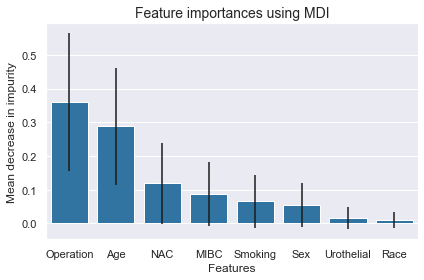

In [7]:
import seaborn as sns
# Plot the importance of features
feature_names = np.array(X.columns)
std = np.std([tree.feature_importances_ for tree in my_final_classifier.estimators_], axis=0)
importances = my_final_classifier.feature_importances_

forest_importances = pd.DataFrame([feature_names, importances, std], index=['Features', 'Importances', 'STD'])
forest_importances = forest_importances.T
forest_importances.sort_values(by=['Importances'], inplace=True, ascending=False)
fig, ax = plt.subplots()
bar = sns.barplot(x='Features', y='Importances', yerr=forest_importances['STD'], ax=ax, data=forest_importances, color='tab:blue')
ax.set_title("Feature importances using MDI", fontsize=14)
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(testfile + '_feature_importance.pdf', bbox_inches='tight')

In [8]:
df_train = df.loc[train_in, :]
df_test = df.loc[test_in, :]

In [9]:
# Save file with prediction
df.to_csv(testfile + '_prediction_all.txt', sep='\t')
df_train.to_csv(testfile + '_prediction_train.txt', sep='\t')
df_test.to_csv(testfile + '_prediction_test.txt', sep='\t')

FPR Train  TPR Train
0     0.0000     0.0000
1     0.0000     0.0625
2     0.0000     1.0000
3     0.8125     1.0000
4     0.9375     1.0000
5     1.0000     1.0000

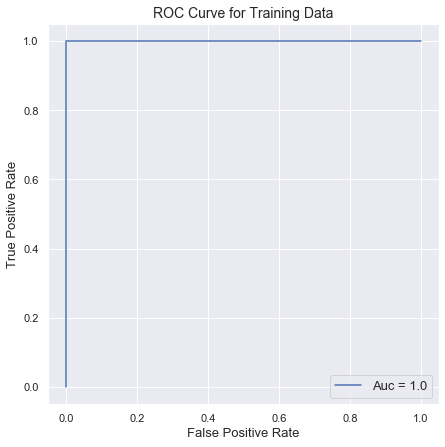

In [10]:
# Training ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(fpr_train, tpr_train, label='Auc = ' + str(np.around(auc_train, decimals=2)))
df_ROC_train = pd.DataFrame([fpr_train, tpr_train], index=['FPR Train', 'TPR Train']).T
display(df_ROC_train)
ax.set_xlabel('False Positive Rate', fontsize=13)
ax.set_ylabel('True Positive Rate', fontsize=13)
ax.set_title('ROC Curve for Training Data', fontsize=14)
plt.legend(fontsize=13)
plt.savefig(testfile + '_roc_train.pdf', bbox_inches='tight')
df_ROC_train.to_csv(testfile + '_ROC_train.txt', sep='\t')

FPR Train  TPR Train
0   0.000000        0.0
1   0.000000        0.1
2   0.000000        0.7
3   0.066667        0.7
4   0.066667        0.8
5   0.133333        0.8
6   0.133333        0.9
7   0.200000        0.9
8   0.200000        1.0
9   1.000000        1.0

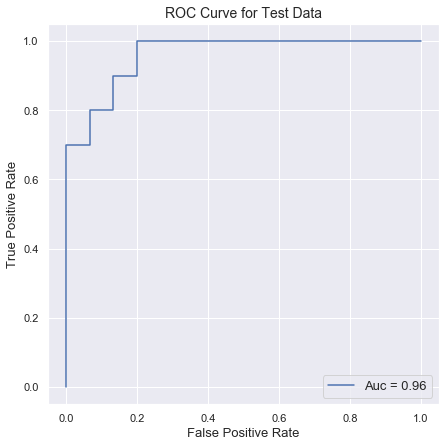

In [11]:
# Testing ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(fpr, tpr, label='Auc = ' + str(np.around(auc_test, decimals=2)))
df_ROC_test = pd.DataFrame([fpr, tpr], index=['FPR Train', 'TPR Train']).T
display(df_ROC_test)
ax.set_xlabel('False Positive Rate', fontsize=13)
ax.set_ylabel('True Positive Rate', fontsize=13)
ax.set_title('ROC Curve for Test Data', fontsize=14)
plt.legend(fontsize=13)
plt.savefig(testfile + '_roc_test.pdf', bbox_inches='tight')
df_ROC_test.to_csv(testfile + '_ROC_test.txt', sep='\t')

FPR Train  TPR Train
0    0.000000   0.000000
1    0.000000   0.038462
2    0.000000   0.346154
3    0.000000   0.423077
4    0.000000   0.884615
5    0.032258   0.884615
6    0.032258   0.923077
7    0.064516   0.923077
8    0.064516   0.961538
9    0.096774   0.961538
10   0.096774   1.000000
11   0.903226   1.000000
12   0.967742   1.000000
13   1.000000   1.000000

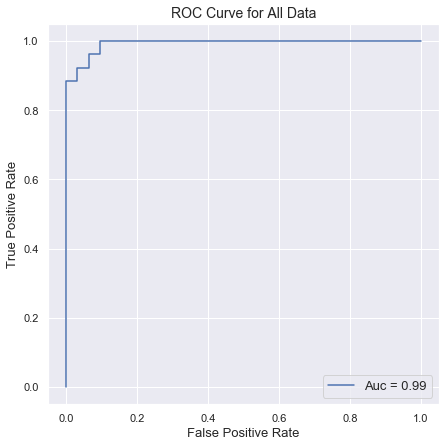

In [12]:
# Combined ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(fpr_all, tpr_all, label='Auc = ' + str(np.around(auc_all, decimals=2)))
df_ROC = pd.DataFrame([fpr_all, tpr_all], index=['FPR Train', 'TPR Train']).T
display(df_ROC)
ax.set_xlabel('False Positive Rate', fontsize=13)
ax.set_ylabel('True Positive Rate', fontsize=13)
ax.set_title('ROC Curve for All Data', fontsize=14)
plt.legend(fontsize=13)
plt.savefig(testfile + '_roc_all.pdf', bbox_inches='tight')
df_ROC.to_csv(testfile + '_ROC_combined.txt', sep='\t')

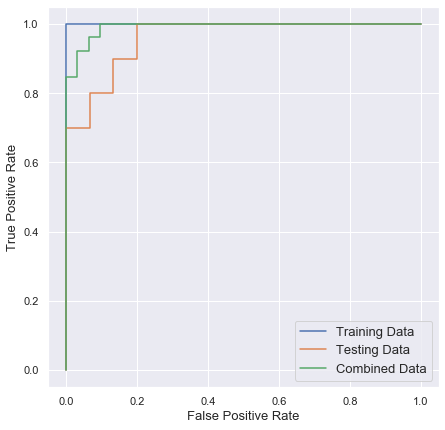

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(fpr_train, tpr_train, label='Training Data')
ax.plot(fpr, tpr, label='Testing Data')
ax.plot(fpr_all, tpr_all, label='Combined Data')
ax.set_xlabel('False Positive Rate', fontsize=13)
ax.set_ylabel('True Positive Rate', fontsize=13)
plt.legend(fontsize=13)
plt.savefig(testfile + '_roc_combined.pdf', bbox_inches='tight')